The dataset is from Kaggle. This is all about predicting the salary of a person based on the Level the person is working in the company.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:/Users/sairam/Downloads/datasets/position_salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df_new=df.iloc[:,[1,2]]

In [6]:
df_new.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


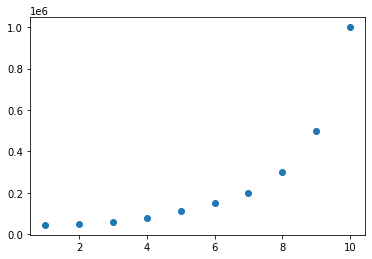

In [7]:
plt.scatter(df['Level'],df['Salary'])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg=LinearRegression()

In [10]:
features=df_new.iloc[:,[0]]

In [11]:
labels=df_new.iloc[:,[1]]

In [12]:
lin_reg.fit(features,labels)

LinearRegression()

In [13]:
lin_reg.score(features,labels)

0.6690412331929895

In [14]:
lin_reg.coef_

array([[80878.78787879]])

In [15]:
lin_reg.intercept_

array([-195333.33333333])

In [16]:
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
mse=mean_squared_error(labels,lin_reg.predict(features))

In [18]:
mse

26695878787.878788

In [19]:
np.sqrt(mse)

163388.73519272613

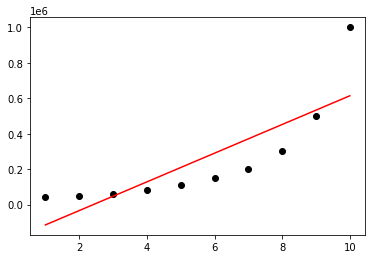

In [20]:
plt.scatter(df['Level'],df['Salary'],color='black')
plt.plot(df['Level'],lin_reg.predict(features),color='red')



We can use polynomialfunction because here th epoints are non linear.
we will create both the models(Linear and Polynomial), so that we can compare both the prediction.


In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly_ft=PolynomialFeatures(degree=2)

In [23]:
x_poly=poly_ft.fit_transform(features)

In [24]:
x_poly[0]

array([1., 1., 1.])

In [25]:
lin_reg2=LinearRegression()

In [26]:
lin_reg2.fit(x_poly,labels)

LinearRegression()

In [27]:
lin_reg2.score(x_poly,labels)

0.9162082221443942

In [28]:
mse1=mean_squared_error(labels,lin_reg2.predict(x_poly))

In [29]:
mse1

6758833333.333334

In [30]:
np.sqrt(mse1)

82212.12400451246

In [31]:
poly_ft1=PolynomialFeatures(degree=3)

In [32]:
x_poly1=poly_ft1.fit_transform(features)

In [33]:
lin_reg3=LinearRegression()
lin_reg3.fit(x_poly1,labels)

LinearRegression()

In [34]:
lin_reg3.score(x_poly1,labels)

0.9812097727913367

In [35]:
mse2=mean_squared_error(labels,lin_reg3.predict(x_poly1))

In [36]:
mse2

1515662004.6620033

In [37]:
np.sqrt(mse2)

38931.504012329184

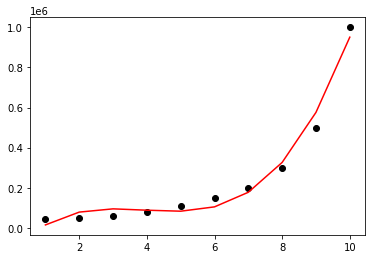

In [38]:
plt.scatter(df['Level'],df['Salary'],color='black')
plt.plot(df['Level'],lin_reg3.predict(x_poly1),color='red')